<h1 style="color:#0bbdb7; padding:20px; text-align:center; font-size:28px; border-top-left-radius:10px; border-top-right-radius:10px;background:#03021f; border:2px solid #0bbdb7; margin:0px;">Breast Cancer Detection Using GAN</h1>
<img src="https://i.imgur.com/NLGPJ.jpg" width=100% height=auto style="margin:0px;">


# Breast cancer mass segmentation
### based on Semantic Image Segmentation using UNet

In [1]:
#importing librarys

# cv2 is a python extarnal package to do image processing and manipulation related stuff.
import cv2 

# imutils is a series of convenience functions to make basic image processing easy.
import imutils

# tensorflow is a python library for machine learning and artificial intelligence related work.
import tensorflow as tf 


# NumPy is a Python library used for working with arrays
import numpy as np



# Keras is a library that provides a Python interface for artificial neural networks. 
# Keras acts as an interface for the TensorFlow library.
import keras


# 1. Keras layers are the building blocks of the Keras library that can be stacked together for creating neural network models.
# 2. Keras Conv2D creates a 2D convolution kernel that is wind with layers input which helps produce a tensor of outputs.
# 3. maxpooling2D Downsamples the input along its spatial dimensions by taking the maximum value over an input window for each channel of the input. 
# 4 .Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
# 5 .Dropout regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data.
# 6. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


#  Model groups layers into an object with training and inference features.
from tensorflow.keras.models import Model

# tensorflow.keras.callbacks is used to visualize training of a model.
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint 

# used to split dataset(features and target) into test and test
from sklearn.model_selection import train_test_split

# F1/F Score is a measure of how accurate a model is by using Precision and Recall following the 
# formula of: F1_Score = 2 * ((Precision * Recall) / (Precision + Recall)) 
# Precision is commonly called positive predictive value.
from sklearn.metrics import f1_score

# shuffle the dataset for a even mixture of each type of feature and target.it gives better result.
from sklearn.utils import shuffle

# A one hot encoding allows the representation of categorical data to be more expressive.
from sklearn.preprocessing import OneHotEncoder

# confusion matrix is used to evaluate the accuracy of a classification.[[TP,FP],[FN,TN]]
# A classification report is a performance evaluation metric in machine learning. 
# It is used to show the precision, recall, F1 Score, and support of your trained classification model.
from sklearn.metrics import confusion_matrix,classification_report

# The OS module in Python provides functions for interacting with the operating system.
import os

# Matplotlib is a data visualization and graphical plotting library for Python.
import matplotlib.pyplot as plt

# seaborn is alse a data visualization and graphical plotting library for Python.
import seaborn as sn

# used to display markdown,image,control (frontend utilities)
from IPython import display

# to subpress warning
import warnings
warnings.filterwarnings("ignore")


# dataset path 
path = "D:/Image_datasets/breast_cancer_image_dataset/Dataset_BUSI_with_GT/"
# make sure in this dir two folder named "yes" and "no" is present. 

In [2]:
# check physical computing devices
device=tf.config.experimental.list_physical_devices()
for i in device:
    print(i)
if len(device)>1:
    # find GPU details
    print("="*20, "GPU Details", "="*20)
    gpus = GPUtil.getGPUs()
    for gpu in gpus:
        print(gpu_id,gpu.name, gpu.driver,gpu.memoryTotal,gpu.temperature)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [3]:


# make sure root folder contains segmanted data folders"





# view directory tree
def tree_printer(root):
    import os
    try:
        if not os.path.isdir(root) and root!="":
            print(root,": path not exists....")
            return
        if ":" not in root:
            root=os.getcwd().replace("\\","/")+root
            print(root)
    except:
        print("🛠️ set path of the data set from your local mechine")
        return
    
    
    print("🗁",root)
    for d in os.listdir(root):
        try:
            print(" |- 🗁",d," "*2+"📍",len(os.listdir(os.path.join(root, d))),"items")
        except:
            continue
            
tree_printer(path)

🗁 D:/Image_datasets/breast_cancer_image_dataset/Dataset_BUSI_with_GT/
 |- 🗁 benign   📍 891 items
 |- 🗁 malignant   📍 421 items
 |- 🗁 normal   📍 266 items


In [14]:
image_size=(128,128) # defining the image size 


def load_images(path,type="png",real_images=[],seg_images=[]):
    for filepath in os.listdir(path):
        if filepath.split(".")[-1].lower()=="png" and "mask" in filepath:
            img=cv2.imread(path+"/"+filepath)
            # resizing the image in defined size
            img=cv2.resize(img,image_size)
            # putting in image array
            img=np.array(img)
            # putting in image array
            seg_images.append(img)
        if filepath.split(".")[-1].lower()=="png" and not "mask" in filepath:
            img=cv2.imread(path+"/"+filepath)
            # resizing the image in defined size
            img=cv2.resize(img,image_size)
            # putting in image array
            img=np.array(img)
            # putting in image array
            real_images.append(img)
            
    
    return [real_images,seg_images]


        
def prepare_image_target(path,result):
    img=cv2.imread(path)
    img=crop_contour_img(img,True)
    img=cv2.resize(img,(128,128))
    img=np.array(img)
    img=img.reshape(1,128,128,3)
    img=img.reshape(-1)
    if result=="yes":
        return [img,[1]]
    else:
        return [img,[0]]
    
    
def show_image(datasets,num=4):  
    for i in range(num**2):
        plt.subplot(num, num, i+1)
        plt.imshow(datasets[i])
        plt.title(i+1)
        plt.axis('off')

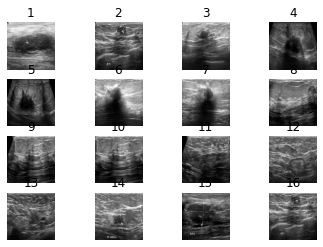

In [21]:
# yes
real_images,seg_images=load_images(path+"/malignant",real_images=[],seg_images=[])
# print(images.shape)
show_image(real_images)

# print(result)

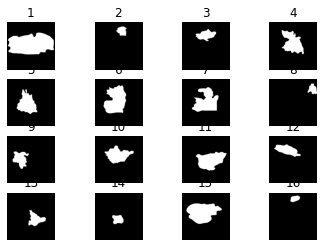

In [24]:
show_image(seg_images)

In [25]:
real_images,seg_images=load_images(path+"/malignant",real_images,seg_images)

In [26]:
real_data=np.array(real_images)
print(real_data.shape)

seg_data=np.array(seg_images)
print(seg_data.shape)

(418, 128, 128, 3)
(420, 128, 128, 3)
